<a href="https://colab.research.google.com/github/behnaznikkhah/COVID-19ImpactOnStockMarket/blob/master/VisualizeHeadlinesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#VisualizeHeadlinesData.ipynb

# Sai Madhuri Yerramsetti
# November 30, 2020
# Student Number: 0677671

# import required packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# To disable warnings which arise from chained assignment
pd.options.mode.chained_assignment = None

# Function to display various graphs
def visualize_headlines_data():
    
    # Read the file
    corona_news = pd.read_csv('corona_headlines.csv')

    # read the stock market data from csv
    stock_prices = pd.read_csv('stock_prices_merged.csv')

    # read the covid cases from csv
    covid_cases = pd.read_csv('Covid.csv')

    # read the pre-processed headlines data
    clean_data = pd.read_csv('final_data.csv')

    # read the accuracy data of ML algorithms from csv files
    bow_acc = pd.read_csv('acc_data_BoW.csv')
    bigram_acc = pd.read_csv('acc_data_BiGrams.csv')
    tf_idf_acc = pd.read_csv('acc_data_TfIdf.csv')
    svm_ada_bow = pd.read_csv('acc_data_svm_adaboost_bow.csv')
    svm_ada_bigram = pd.read_csv('acc_data_svm_adaboost_bigram.csv')
    svm_ada_tfidf = pd.read_csv('acc_data_svm_adaboost_tfidf.csv')
    lstm_embedding_acc = pd.read_csv('acc_data_LSTMEmbedding.csv')

    # Change datatype of Date column
    covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
    covid_cases.sort_values(by='Date')

    # Impute missing values with 0
    covid_cases = covid_cases.fillna(0)
    print("final data null values: ", covid_cases.isnull().sum())

    # Change the data string into datetime object
    stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

    # Change datatype of Date column
    clean_data['Date'] = pd.to_datetime(clean_data['Date'])
    clean_data.sort_values(by='Date')

    # Convert the Date column to datetime type, sort the values and check for any null values
    corona_news['Date'] = pd.to_datetime(corona_news['Date'], format='%Y%m%d')
    corona_news.sort_values(by='Date')
    print("Corona news data before combining strings: \n", corona_news.head(5))

    # Create new column "Month" and get monthly headline count in new dataframe
    corona_news['Month'] = pd.DatetimeIndex(corona_news['Date']).month
    headlines_month_count = corona_news.groupby('Month', as_index=False).agg({"News": "count"})
    print(headlines_month_count.head(5))

    # Get count of headlines for each date in a new dataframe
    headlines_date_count = corona_news.groupby('Date', as_index=False).agg({"News": "count"})
    print(headlines_date_count.head(5))

    # Create new columns for headline length and headline word count
    corona_news['HeadlineLength'] = corona_news['News'].apply(lambda x : len(x))
    corona_news['WordCount'] = corona_news['News'].apply(lambda x: len(x.split()))

    # Calculate average word count of headlines per each date
    average_word_count = corona_news.groupby('Date', as_index=False).agg({"WordCount": np.average})
    print(average_word_count.head(5))

    # Plot a graph for ditribution of average word count of headlines before preprocessing
    sns.set(style="white")
    sns.displot(average_word_count, x="WordCount",  kde=True)
    plt.xlabel("Average headline word count")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of average Covid headlines word count before preprocessing")  #set the title of the plot
    plt.show()

    # get word count of preprocessed headlines in a new column
    model_data = clean_data[clean_data['Country'] == 'Canada']
    model_data['WordCount'] = model_data['News'].apply(lambda x: len(x.split()))
    print(model_data.head(5))

    # Plot a graph for ditribution of word count of headlines after preprocessing
    sns.set(style="white")
    sns.displot(model_data, x="WordCount",  kind="kde", fill=True)
    plt.xlabel("Headline word count")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of Covid headlines word count after preprocessing")  #set the title of the plot
    plt.show()

    # Plot a graph for ditribution of length of headlines before preprocessing
    sns.set(style="white")
    sns.displot(corona_news, x="HeadlineLength", binwidth=3)
    plt.xlabel("Length of headlines")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of Covid headlines length before preprocessing")  #set the title of the plot
    plt.show()

    # Plot a graph for headlines count vs Date
    plt.style.use('ggplot')
    sns.lineplot(data=headlines_date_count, x="Date", y="News")
    plt.xlabel("Date")  #set the axis labels
    plt.ylabel("Headlines count")  #set the axis labels
    plt.title("Covid Headlines count per date")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.show()

    # Plot a graph for headlines count vs Date
    plt.style.use('ggplot')
    sns.lineplot(data=headlines_month_count, x="Month", y="News")
    plt.xlabel("Month")  #set the axis labels
    plt.ylabel("Headlines count")  #set the axis labels
    plt.title("Covid Headlines count per month")  #set the title of the plot
    plt.axvline(x = 2.0, ymin = 0, ymax = 75000, color ='green', linestyle='--')  #draw a vertical line near the surge of headlines
    plt.show()

    # Remove the extra ',' string from the '% Change' column values and convert them to numeric values
    stock_prices['Price'] = stock_prices['Price'].str.replace(r',', '')
    stock_prices[["Price"]] = stock_prices[["Price"]].apply(pd.to_numeric)

    # create a new column for log price
    stock_prices['log_price'] = np.log10(stock_prices['Price'])

    # create a lineplot for log price vs Date for all countries
    sns.lineplot(data=stock_prices, x="Date", y="log_price", hue="Country")
    plt.xlabel("Date")  #set the axis labels
    plt.ylabel("Log Price")  #set the axis labels
    plt.title("Log Stock Price vs Date for all countries")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #set legend position outside the plot
    plt.axvline(x = pd.to_datetime('2020-03'), color ='black', linestyle='--')  #draw a vertical line near the drop of stock price
    plt.show()

    # draw a countplot of the 'Label' column
    sns.countplot(x='Label', data=clean_data)

    # get world covid data for 2020 year into new dataframe and add a new column for new cases count
    world_cases=covid_cases[covid_cases['Country'] == 'World']
    world_cases = world_cases[world_cases['Date'] > '2019-12-31']
    world_cases['NewCases'] = world_cases['ActiveCases'].diff()
    world_cases.dropna(subset = ["NewCases"], inplace=True) # drop missing values
    print(world_cases.head(15))

    # plot lineplot for New Covid active cases count per day around the world
    plt.style.use('ggplot')
    sns.lineplot(data=world_cases, x="Date", y="NewCases")
    plt.xlabel("Date") #set the axis labels
    plt.ylabel("New active cases Count") #set the axis labels
    plt.title("New Covid active cases count per day around the world") #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.show()

    # merge the accuracies of svm and adaboost classifiers (they were taken seperately) with rest of the classifier accuracies
    bow_acc =  pd.merge(bow_acc, svm_ada_bow, on=['Country'], how='inner')
    tf_idf_acc =  pd.merge(tf_idf_acc, svm_ada_tfidf, on=['Country'], how='inner')
    bigram_acc =  pd.merge(bigram_acc, svm_bigram, on=['Country'], how='inner')

    # add a new column in each accuracy dataframe for the type of vectorizer
    bow_acc['Vectorizer'] = 'Bag_of_words'
    bigram_acc['Vectorizer'] = 'bigram_model'
    tf_idf_acc['Vectorizer'] = 'tf_idf'

    # Merge all vectorizer accuracies into single file and make new column for type classifier
    accuracy_data = bow_acc.append(bigram_acc, ignore_index = True) 
    accuracy_data = accuracy_data.append(tf_idf_acc, ignore_index = True)
    accuracy_data = accuracy_data.melt(id_vars =['Country', 'Vectorizer'], 
                                       value_vars =["KNN", "DecisionTree", "MultinomialNB", "SGD", "RandomForest"], 
                                       var_name ='Classifier', value_name ='Accuracy') 
    
    # Multiply accuracies with 100
    accuracy_data['Accuracy'] = accuracy_data['Accuracy'].apply(lambda x: x*100)
    print(accuracy_data.head(5))

    # Check the country-wise best accuracies 
    accuracy_data.iloc[accuracy_data.groupby('Country')['Accuracy'].agg(pd.Series.idxmax)]

    # Check classifier-wise best accuracies
    accuracy_data.iloc[accuracy_data.groupby('Classifier')['Accuracy'].agg(pd.Series.idxmax)]

    # Check Vectorizer-wise best accuracies
    accuracy_data.iloc[accuracy_data.groupby('Vectorizer')['Accuracy'].agg(pd.Series.idxmax)]

    # set the style of the graph to white and plot a boxplot for Distribution of accuracies of different classifiers
    sns.set(style="white")
    plt.figure(figsize=(15,10))
    sns.boxplot(x="Classifier", y="Accuracy",
            hue="Vectorizer", 
            data=accuracy_data,
            showmeans = True)
    plt.xlabel("Machine learning Classifier") #set the axis labels
    plt.ylabel("Accuracy of the model") #set the axis labels
    plt.title("Distribution of accuracies of different classifiers") #set the title of the plot
    plt.show()

    # set the style of the graph to white and plot a boxplot for Distribution of accuracies of different vectorizers
    sns.set(style="white")
    plt.figure(figsize=(15,10))
    sns.boxplot(x="Vectorizer", y="Accuracy",
            hue="Classifier", 
            data=accuracy_data,
            showmeans = True)
    plt.xlabel("Vectorizer Type") #set the axis labels
    plt.ylabel("Accuracy of the model") #set the axis labels
    plt.title("Distribution of accuracies of different vectorizers") #set the title of the plot
    plt.show()


    # subplots for various classifier accuracies for all countries considered
    plt.style.use('ggplot')
    fig, axes = plt.subplots(3, 3, figsize=(20, 18)) #set the plot size
    sns.pointplot(ax=axes[0, 0], data=accuracy_data[accuracy_data['Classifier'] == 'KNN'], x='Country', y='Accuracy', color='blue')
    sns.pointplot(ax=axes[0, 1], data=accuracy_data[accuracy_data['Classifier'] == 'DecisionTree'], x='Country', y='Accuracy', color='red')
    sns.pointplot(ax=axes[0, 2], data=accuracy_data[accuracy_data['Classifier'] == 'MultinomialNB'], x='Country', y='Accuracy', color='green')
    sns.pointplot(ax=axes[1, 0], data=accuracy_data[accuracy_data['Classifier'] == 'SGD'], x='Country', y='Accuracy', color='purple')
    sns.pointplot(ax=axes[1, 1], data=accuracy_data[accuracy_data['Classifier'] == 'RandomForest'], x='Country', y='Accuracy', color='darkorange')
    sns.pointplot(ax=axes[1, 2], data=accuracy_data[accuracy_data['Classifier'] == 'SVM'], x='Country', y='Accuracy', color='navy')
    sns.pointplot(ax=axes[2, 0], data=accuracy_data[accuracy_data['Classifier'] == 'Adaboost'], x='Country', y='Accuracy', color='brown')
    axes[2, 1].set_axis_off() #turn off the axis for plot in 2,1 position
    axes[2, 2].set_axis_off() #turn off the axis for plot in 2,2 position
    axes[0, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 1].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 2].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 1].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 2].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[2, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 0].set_title('KNN classifier accuracies') #set the title of the subplot
    axes[0, 1].set_title('DecisionTree classifier accuracies') #set the title of the subplot
    axes[0, 2].set_title('MultinomialNB classifier accuracies') #set the title of the subplot
    axes[1, 0].set_title('Stochastic Gradient Descent classifier accuracies') #set the title of the subplot
    axes[1, 1].set_title('RandomForest classifier accuracies') #set the title of the subplot
    axes[1, 2].set_title('Support Vector classifier accuracies') #set the title of the subplot
    axes[2, 0].set_title('Adaboost classifier accuracies') #set the title of the subplot
    plt.tight_layout() #Adjust the layout of the plot automatically
    plt.show()

    # plot for Distribution of classifier accuracies for different vectorizers
    sns.set(style="white")
    sns.displot(accuracy_data, x="Accuracy",  kind="kde", fill=True, hue='Vectorizer')
    plt.xlabel("Classifier Accuracy")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of classifier accuracies for different vectorizers")  #set the title of the plot
    plt.show()

  # pointplot for Classifier accuracies for different vactorizers
   sns.pointplot(data=accuracy_data, x='Country', y='Accuracy', hue='Vectorizer',
                 markers=["x", "s", "+"],
                linestyles=["-", "--", "-."])
    plt.xlabel("Country")  #set the axis labels
    plt.ylabel("Classifier Accuracy")  #set the axis labels
    plt.title("Classifier accuracies for different vactorizers")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1)) #set the location of the legend
    plt.show()

    
if __name__ == "__main__":
    visualize_headlines_data()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file_path_covid = os.path.abspath("")
file_path_market = os.path.abspath("")

# Read in the file content in a DataFrame called owid-covid-data
data_covid = pd.read_csv(os.path.join(file_path_covid, 'owid-covid-data.csv'))#, parse_dates=['Date'], index_col='Date')
#display first 5 rows of raw data
display(data_covid.head(5))

FileNotFoundError: ignored

In [ ]:
#load MAE datasets
file_path = os.path.abspath("")
df_mae = pd.read_excel(os.path.join(file_path, 'final_mae.xlsx'))


NameError: ignored

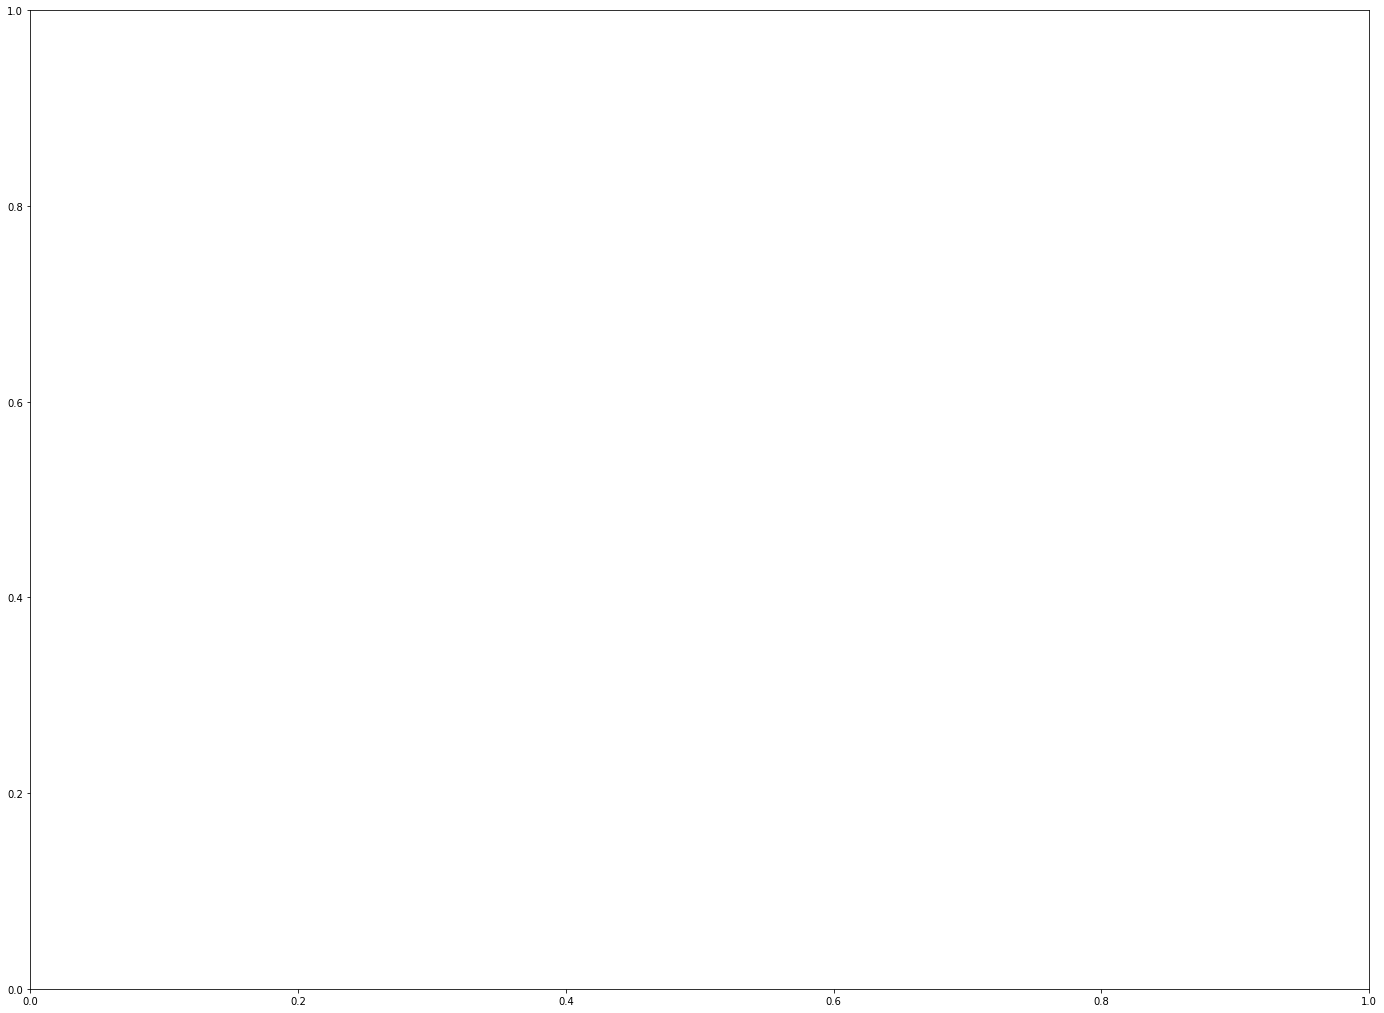

In [ ]:
# Create a Figure and an Axes 
fig, ax = plt.subplots(figsize=(24,18))
#reshaping and categorizing dataset
mae_cat = df_mae.pivot("country", "scenario", "mae")
#using bar plot to compare scenarios' mae for each country
mae_cat.plot(kind='bar',ax=ax,logy=True,colormap='jet',width=0.8)
#rename lagend labels
plt.legend(['worldwide new cases with price exclusion','worldwide total cases with price exclusion','worldwide new cases with price inclusion','worldwide total cases with price inclusion'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 15})
#set the plot title 
plt.title('MAE for different scenario using LSTM to predict market in different countries\n',fontsize=30)
#set the axis labels
plt.xlabel('Country',fontsize=15)
plt.ylabel('MAE',fontsize=15)
#set the size of x ticks
plt.xticks(fontsize=15 )
#display the plot
plt.show()

In [ ]:
file_path_covid = os.path.abspath("")
file_path_market = os.path.abspath("")

# Read in the file content in a DataFrame called CovidData and MarketData
data_covid = pd.read_csv(os.path.join(file_path_covid, 'Covid.csv'))#, parse_dates=['Date'], index_col='Date')
data_market = pd.read_csv(os.path.join(file_path_market, 'Market.csv'))#, parse_dates=['Date'], index_col='Date')

# Display the first five lines of the DataFrame
display(data_covid.head(5))
print('')
print('')
print('')

display(data_market.head(5))

# Change the order of columns
data_covid=data_covid[['Date','Deaths','ActiveCases','Country']]
data_market=data_market[['Date','Country','Price','Open','Low','High','Volume','Change']]
# Convert the date column to a datestamp type
data_covid['Date'] = pd.to_datetime(data_covid['Date'])
data_market['Date'] = pd.to_datetime(data_market['Date'])
# Set the date column as the index of your DataFrame discoveries

data_covid = data_covid.set_index('Date')
data_market = data_market.set_index('Date')

# Print the data type of each column 
display(data_market.dtypes)
display(data_covid.dtypes)



,Country,Date,ActiveCases,Deaths
0,Aruba,2020-03-13,2.0,NaN
1,Aruba,2020-03-19,NaN,NaN
2,Aruba,2020-03-20,4.0,NaN
3,Aruba,2020-03-21,NaN,NaN
4,Aruba,2020-03-22,NaN,NaN


,Date,Price,Open,High,Low,Volume,Change,Country
0,2020-11-18,4952.36,4960.13,4969.39,4930.25,152.48,-0.16,United Arab Emirates
1,2020-11-17,4960.13,4953.91,4992.44,4942.24,177.93,0.17,United Arab Emirates
2,2020-11-16,4951.87,4873.41,4951.87,4873.41,148.70,1.64,United Arab Emirates
3,2020-11-15,4871.85,4858.96,4923.68,4851.43,106.99,0.33,United Arab Emirates
4,2020-11-12,4855.90,4832.02,4872.09,4815.96,93.95,0.49,United Arab Emirates


Country     object
Price      float64
Open       float64
Low        float64
High       float64
Volume     float64
Change     float64
dtype: object

Deaths         float64
ActiveCases    float64
Country         object
dtype: object

In [ ]:
#join covid data and market data
finaldf = pd.merge(data_market,data_covid , how='inner', on=['Date','Country'])
#drop unnecesssry columns
finaldf = finaldf.drop(['Volume','Low','Open','Change','High'], 1)
#display hesd of final data
display(finaldf.head())


,Country,Price,Deaths,ActiveCases
Date,,,,
2020-11-18,United Arab Emirates,4952.36,538.0,152809.0
2020-11-17,United Arab Emirates,4960.13,534.0,151554.0
2020-11-16,United Arab Emirates,4951.87,530.0,150345.0
2020-11-15,United Arab Emirates,4871.85,528.0,149135.0
2020-11-12,United Arab Emirates,4855.90,520.0,145599.0


In [ ]:
#create a dictionary of indeces information 
index_data = {'Definition':  ['Abu Dhabi Securities Exchange (ADX) Composite Index', 'Cotation Assistée en Continu (CAC) 40 Index', 
            'Deutsche Aktien Xchange (DAX) Performance Index', 'Dow Jones Industrial Average Index', 
            'Jakarta Composite Index', 'Korea Composite Stock Price Index', 'Nikkei 225 Index', 
            'S&P/Australian Securities Exchange (S&P/ASX) 200 Index', 'S&P/Toronto Stock Exchange Composite Index (S&P/TSX) Composite Index', 
            'Shanghai Composite Index', 'National Stock Exchange (NIFTY) 50 Index','Brasil Sao Paulo Stock Exchange Index','South Africa Top 40'],
        'Abbreviation': ['ADX','CAC40','GDAXI','DJIA','JKSE','KOSPI','N225','AXJO','GSPTSE','SSEC','NSEI','BVSP','JTOPI'],
        'Country':['United Arab Emirates','France','Germany','United States','Indonesia','Korea','Japan',
          'Australia','Canada','Shanghai','India','Brazil','South Africa']
        }
#creat a dataframe of indeces information
index_info = pd.DataFrame (index_data, columns = ['Definition','Abbreviation','Country'])
#use style function to set values in the center and hide the index 
style_index_info = index_info.style.set_properties(**{'text-align': 'center'}).hide_index()
style_index_info.render()
#display indeces information
display(style_index_info)

Definition,Abbreviation,Country
Abu Dhabi Securities Exchange (ADX) Composite Index,ADX,United Arab Emirates
Cotation Assistée en Continu (CAC) 40 Index,CAC40,France
Deutsche Aktien Xchange (DAX) Performance Index,GDAXI,Germany
Dow Jones Industrial Average Index,DJIA,United States
Jakarta Composite Index,JKSE,Indonesia
Korea Composite Stock Price Index,KOSPI,Korea
Nikkei 225 Index,N225,Japan
S&P/Australian Securities Exchange (S&P/ASX) 200 Index,AXJO,Australia
S&P/Toronto Stock Exchange Composite Index (S&P/TSX) Composite Index,GSPTSE,Canada
Shanghai Composite Index,SSEC,Shanghai


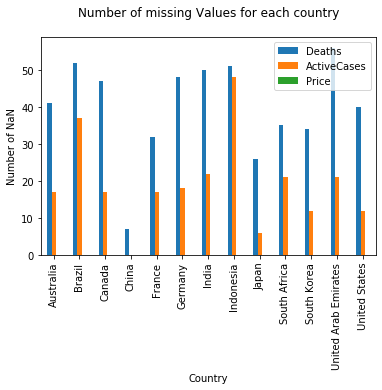

In [ ]:
#a dataframe of the number of Nan values
finaldf_nan=finaldf.groupby('Country').apply(lambda x: x.isna().sum())
#Specify the plot style
plt.style.use('_classic_test_patch')
# use bar plot to display nan values in each country 
ax=finaldf_nan[['Deaths','ActiveCases','Price']].plot(kind='bar')
#set the plot title 
plt.title('Number of missing Values for each country\n')
#set axis labels
plt.ylabel('Number of NaN')
#dispaly the plot
plt.show()



In [ ]:
#replace nan with 0    
data_market=data_market.fillna(0)
data_covid=data_covid.fillna(0)
finaldf=finaldf.fillna(0)

Text(0.06, 5, 'Number of deaths')

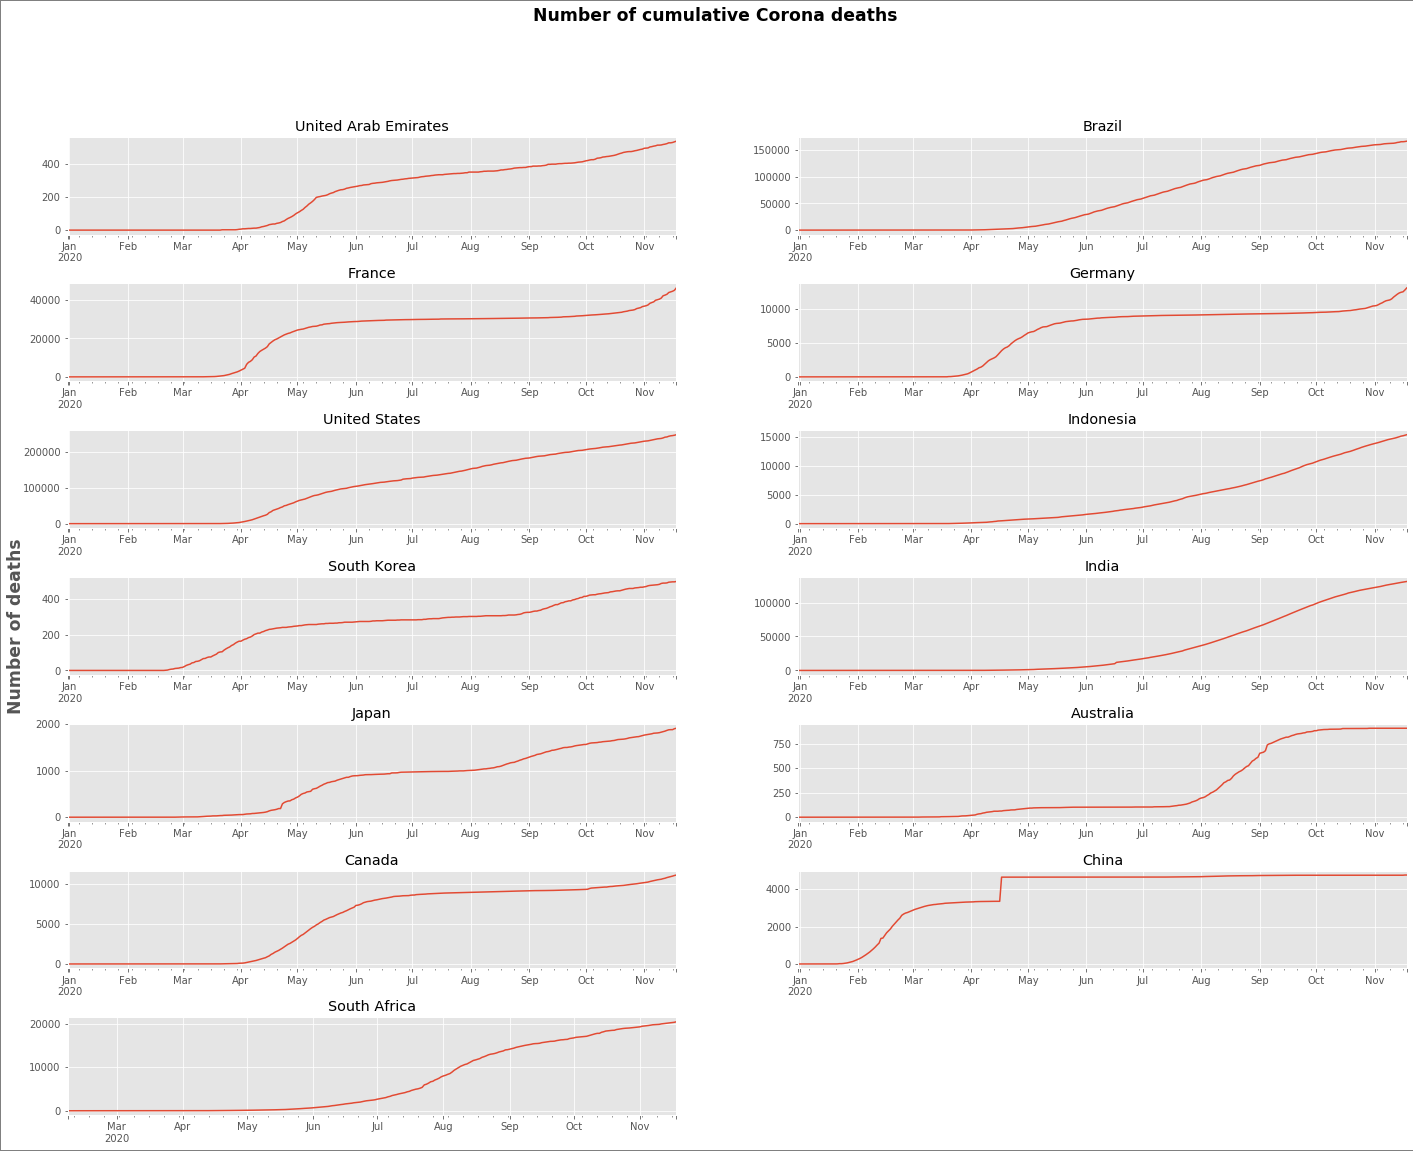

In [ ]:
#use ggplot style
with plt.style.context('ggplot'):
    # Create a Figure and an Axes with plt.subplots
    fig, ax = plt.subplots(figsize=(24, 18), linewidth=2)
    #draw grid
    plt.rcParams["axes.grid"] = True
    #get the name of unique countries
    countrynames = data_market.Country.unique()
    i=1
    #set the plot title
    fig.suptitle('Number of cumulative Corona deaths',fontweight ="bold",fontsize='xx-large')
    #using a for loop to plot all countries data as a subplot
    for country in countrynames:
        #set th eposition of each subplot
        plt.subplot(7,2,i)
        #get the total deaths data
        df_newcases = data_covid[data_covid.Country.eq(country)]['Deaths']
        #use a line plot to display number of deaths
        df_newcases.plot()
        #increase horizental space between each subplot
        plt.subplots_adjust(hspace=0.5)
        #remove subplot axis labels
        plt.ylabel(None)
        plt.xlabel(None)
        #set countries name as the subplot title
        plt.title(f"{countrynames[i - 1]}")
        i=i+1
#set a title for y label
plt.ylabel("Number of deaths",position=(0.06,5),fontsize='x-large',fontweight='black')


Text(0.06, 5, 'Number of active cases')

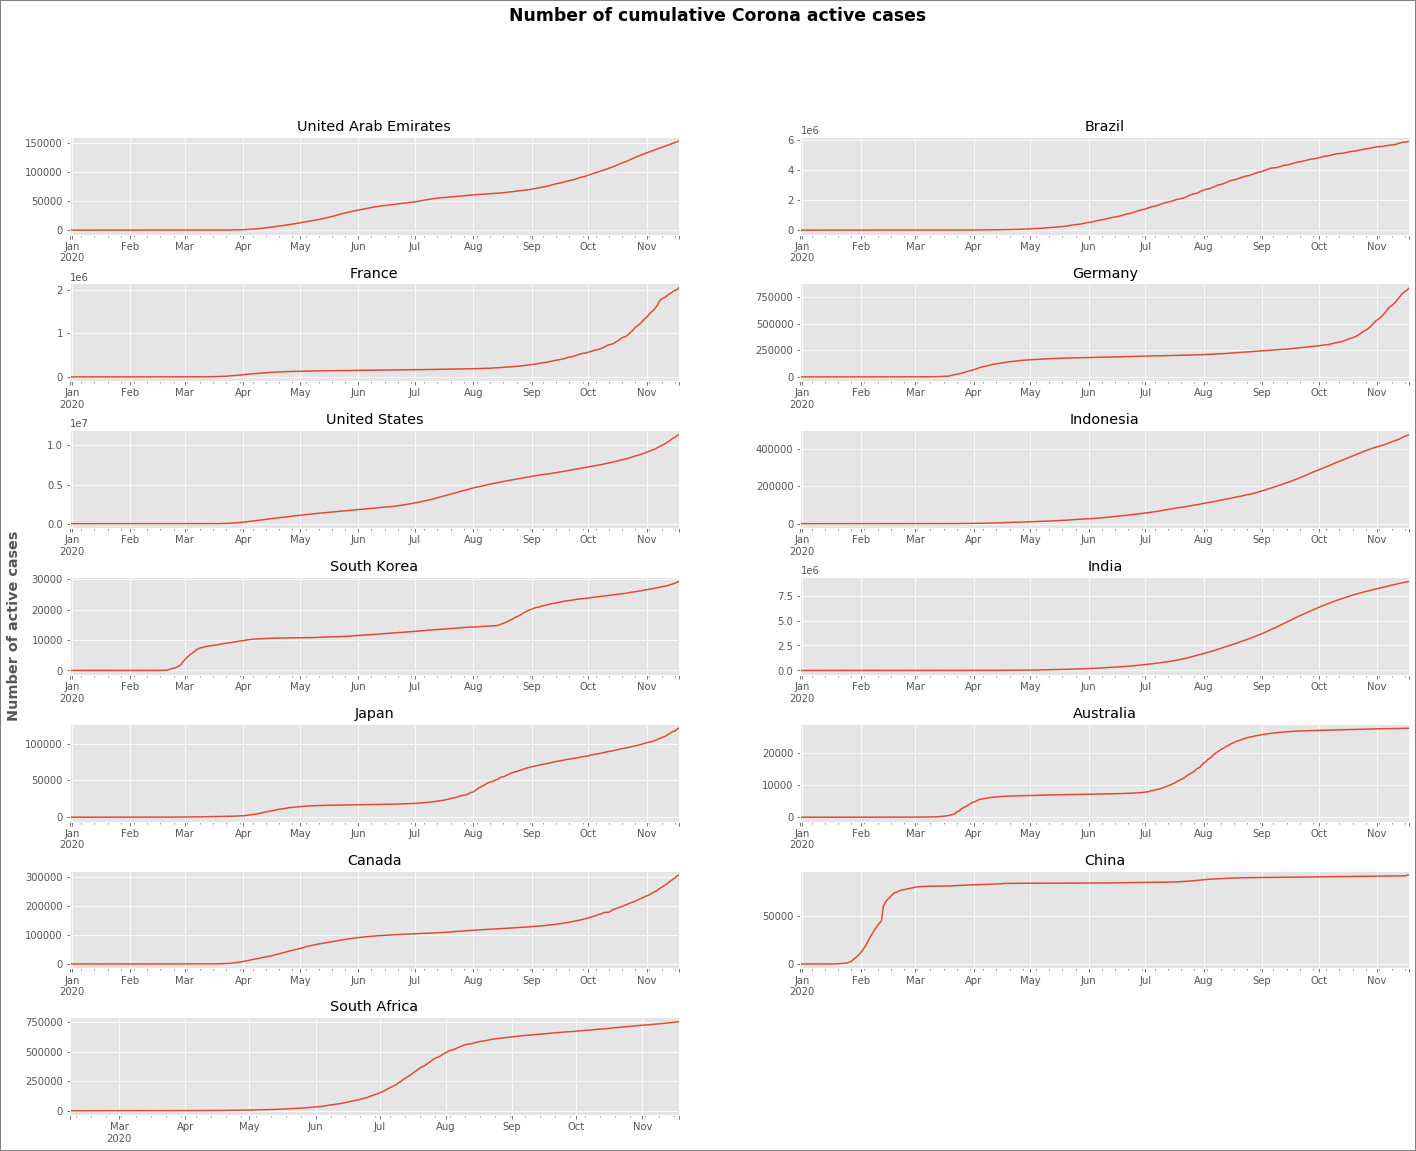

In [ ]:
#use ggplot style
with plt.style.context('ggplot'):
    # Create a Figure and an Axes with plt.subplots
    fig, ax = plt.subplots(figsize=(24, 18), linewidth=2)
    #draw grid
    plt.rcParams["axes.grid"] = True
    #get the name of unique countries
    countrynames = data_market.Country.unique()
    i=1
    #set the plot title
    fig.suptitle('Number of cumulative Corona active cases',fontweight ="bold",fontsize='xx-large')
    #using a for loop to plot all countries data as a subplot
    for country in countrynames:
        #set th eposition of each subplot
        plt.subplot(7,2,i)
        #get the total active cases data
        df_newcases = data_covid[data_covid.Country.eq(country)]['ActiveCases']
        #use a line plot to display number of active cases
        df_newcases.plot()
        #increase horizental space between each subplot
        plt.subplots_adjust(hspace=0.5)
        #remove subplot axis labels
        plt.ylabel(None)
        plt.xlabel(None)
        #set countries name as the subplot title
        plt.title(f"{countrynames[i - 1]}")
        i=i+1
#set a title for y label
plt.ylabel("Number of active cases",position=(0.06,5),fontsize='x-large',fontweight='black')


Text(0.06, 5, 'Number of deaths')

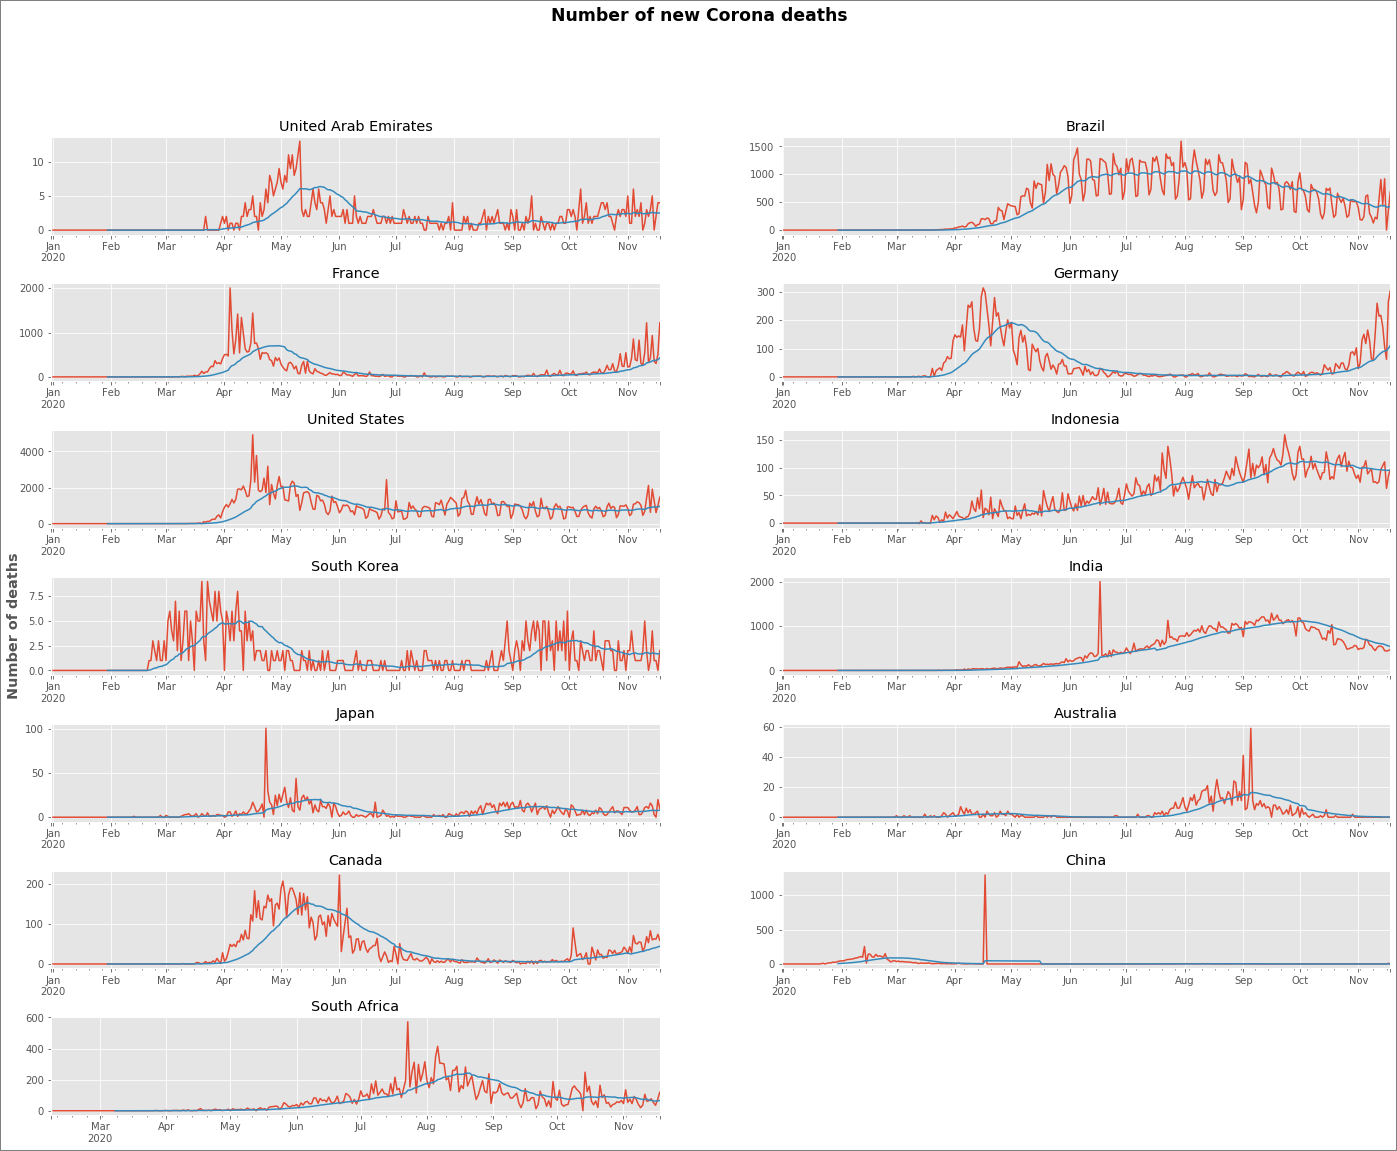

In [ ]:
#use ggplot style
with plt.style.context('ggplot'):
    # Create a Figure and an Axes with plt.subplots
    fig, ax = plt.subplots(figsize=(24, 18), linewidth=2)
    #draw grid
    plt.rcParams["axes.grid"] = True
    #get the name of unique countries
    countrynames = data_market.Country.unique()
    i=1
    #set the plot title
    fig.suptitle('Number of new Corona deaths',fontweight ="bold",fontsize='xx-large')
    #using a for loop to plot all countries data as a subplot
    for country in countrynames:
        #set th eposition of each subplot
        plt.subplot(7,2,i)
        #get the number of new deaths for each day
        df_newcases = data_covid[data_covid.Country.eq(country)]['Deaths'].diff()
        #use a line plot to display number of new deaths
        df_newcases.plot()
        # Compute the 30 days rolling mean of the number of new deaths
        df_deaths_rolling = data_covid[data_covid.Country.eq(country)]['Deaths'].diff().rolling(window=30).mean()
        # Plot the mean of new deaths for last 30 days
        df_deaths_rolling.plot()
        #increase horizental space between each subplot
        plt.subplots_adjust(hspace=0.5)
        #remove subplot axis labels
        plt.ylabel(None)
        plt.xlabel(None)
        #set countries name as the subplot title
        plt.title(f"{countrynames[i - 1]}")
        i=i+1
#set a title for y label
plt.ylabel("Number of deaths",position=(0.06,5),fontsize='x-large',fontweight='black')


Text(0.06, 5, 'Number of active cases')

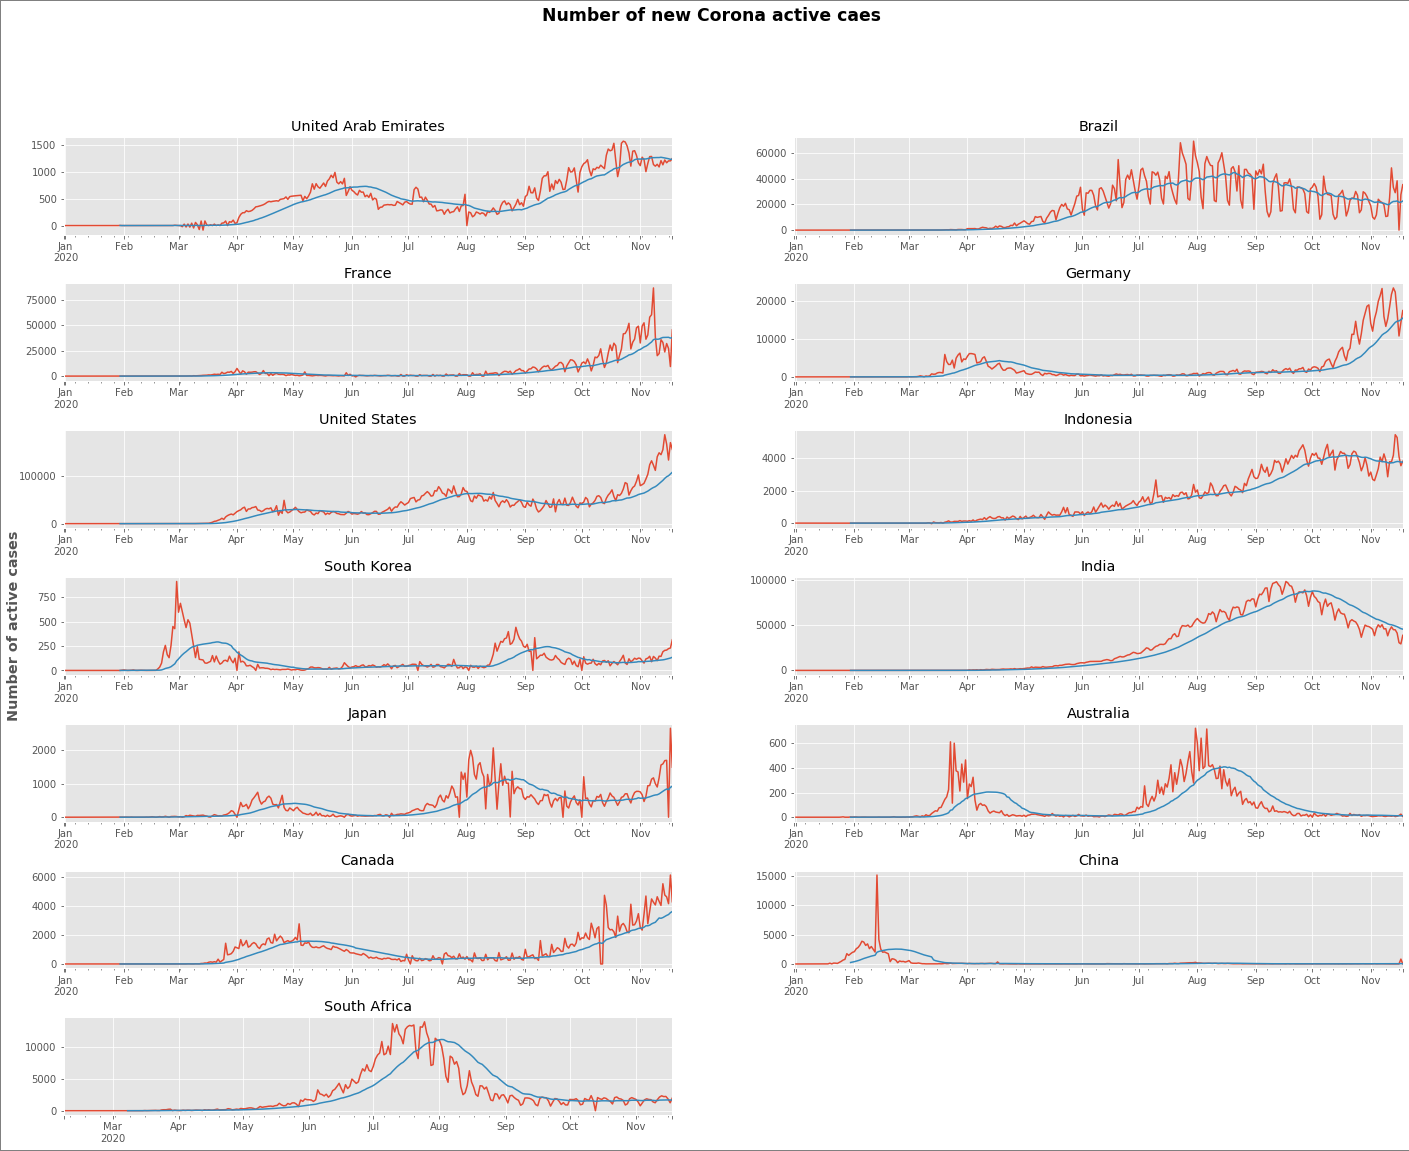

In [ ]:
#use ggplot style
with plt.style.context('ggplot'):
    # Create a Figure and an Axes with plt.subplots
    fig, ax = plt.subplots(figsize=(24, 18), linewidth=2)
    #draw grid
    plt.rcParams["axes.grid"] = True
    #get the name of unique countries
    countrynames = data_market.Country.unique()
    i=1
    #set the plot title
    fig.suptitle('Number of new Corona active caes',fontweight ="bold",fontsize='xx-large')
    #using a for loop to plot all countries data as a subplot
    for country in countrynames:
        #set th eposition of each subplot
        plt.subplot(7,2,i)
        #get the number of new active cases for each day
        df_newcases = data_covid[data_covid.Country.eq(country)]['ActiveCases'].diff()
        #use a line plot to display number of new active cases
        df_newcases.plot()
        # Compute the 30 days rolling mean of the number of new active cases
        df_deaths_rolling = data_covid[data_covid.Country.eq(country)]['ActiveCases'].diff().rolling(window=30).mean()
        # Plot the mean of new active cases for last 30 days
        df_deaths_rolling.plot()
        #increase horizental space between each subplot
        plt.subplots_adjust(hspace=0.5)
        #remove subplot axis labels
        plt.ylabel(None)
        plt.xlabel(None)
        #set countries name as the subplot title
        plt.title(f"{countrynames[i - 1]}")
        i=i+1
#set a title for y label
plt.ylabel("Number of active cases",position=(0.06,5),fontsize='x-large',fontweight='black')


In [ ]:
#use ggplot style
with plt.style.context('ggplot'):
    # Create a Figure and an Axes with plt.subplots
    fig, ax = plt.subplots(figsize=(24, 18), linewidth=2)
    #draw grid
    plt.rcParams["axes.grid"] = False
    #get the name of unique countries
    countrynames = data_market.Country.unique()
    i=1
    #set the plot title
    fig.suptitle('Stock market Index price',fontweight ="bold",fontsize='xx-large')
    #using a for loop to plot all countries data as a subplot
    for country in countrynames:
        #set the position of each subplot
        plt.subplot(7,2,i)
        #get index price for each country
        df_price = data_market[data_market.Country.eq(country)]['Price']
        #add a horizental line on 20th Fab
        df_price.plot().axvline('2020-02-20', color='red', linestyle='--')
        #add a vertical line on 20th Fab
        df_price.plot().axhline(data_market[data_market.Country.eq(country)]['Price']['2020-02-20'].values[0], color='green', linestyle='--')
        # rotate and align the tick labels
        fig.autofmt_xdate() 
        #remove subplot axis labels
        plt.ylabel(None)
        plt.xlabel(None)
        #set countries name as the subplot title
        plt.title(f"{countrynames[i - 1]}")
        i=i+1
#set y label title 
plt.ylabel("close price",position=(0.06,5),fontsize='x-large',fontweight='black')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.93, 'Stock market Index price distribution')

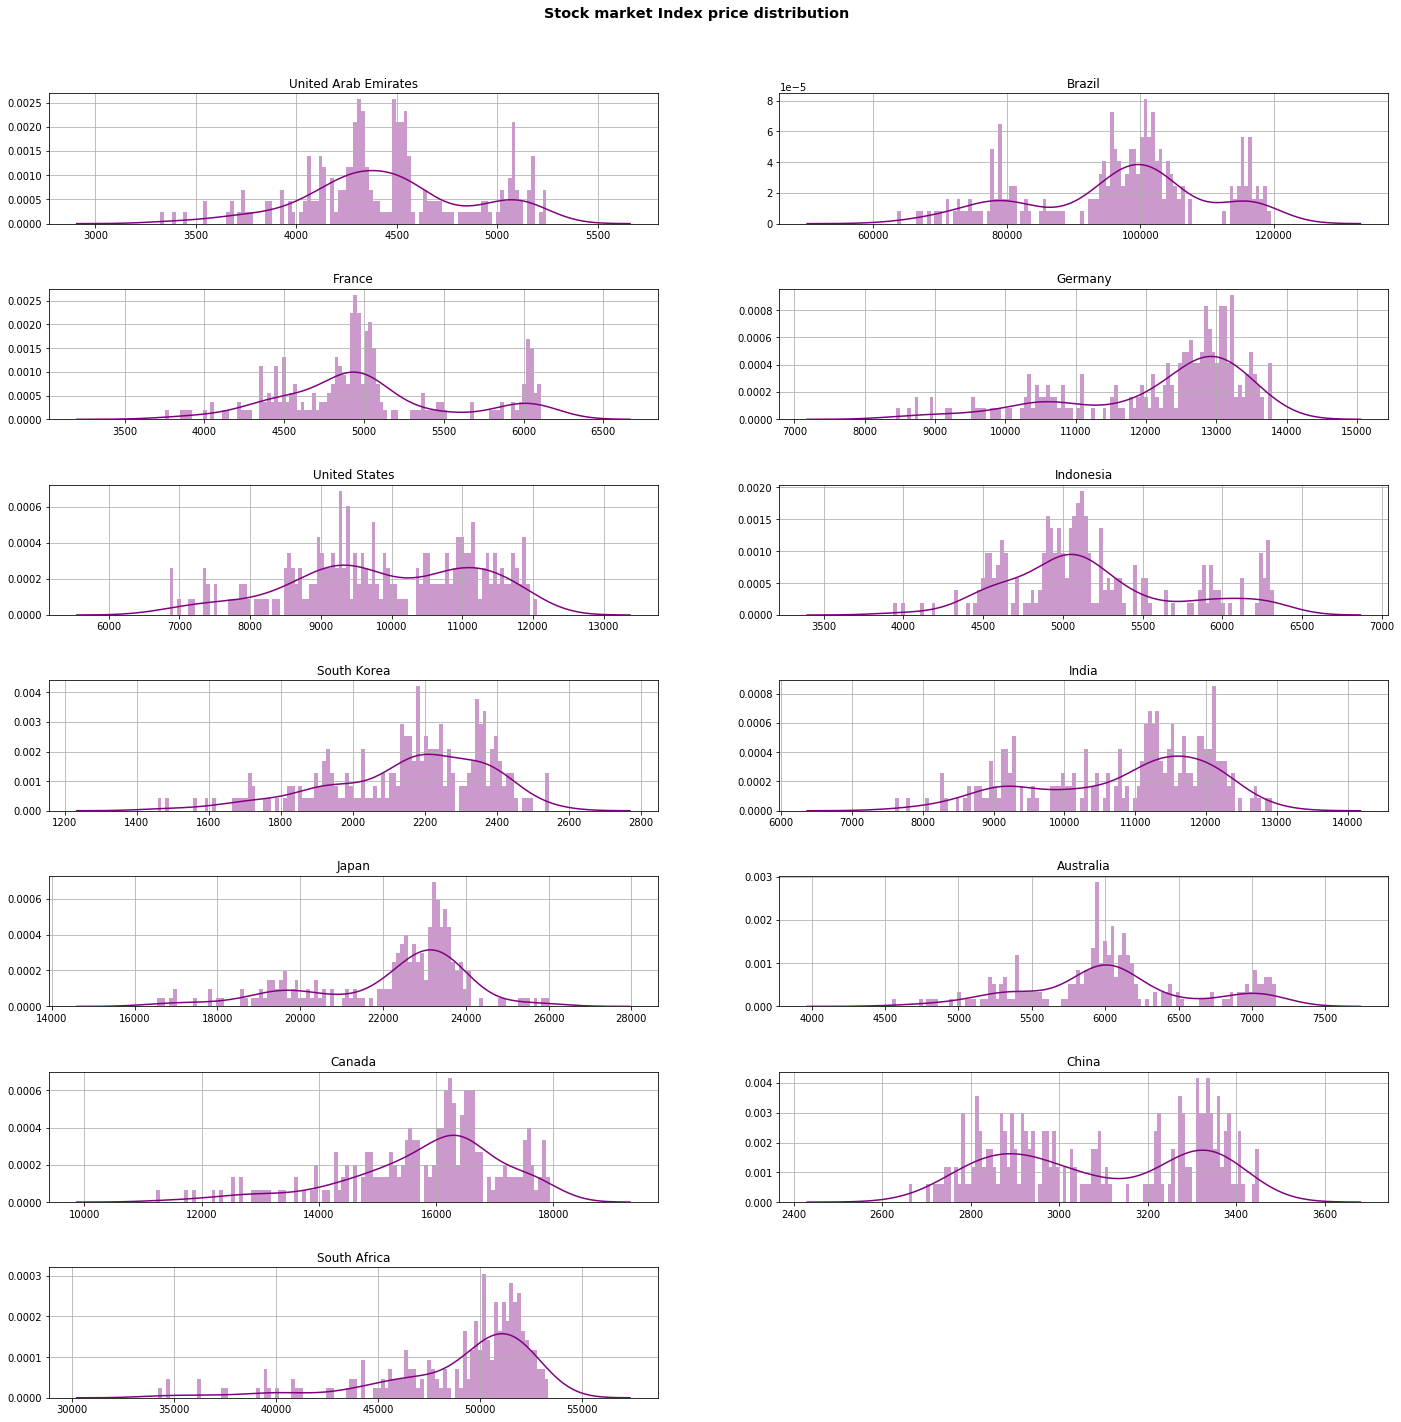

In [ ]:
# Create a Figure 
fig=plt.figure(figsize=(24, 24))
i=1
for country in countrynames:
    #set the position of each subplot
    plt.subplot(7, 2, i)
    #get index price for each country
    df_price = data_market[data_market.Country.eq(country)]['Price']
    #plot distribution of index price
    sns.distplot(df_price, bins=100, color='purple')
    #remove subplot axis labels
    plt.ylabel('')
    plt.xlabel('')
    #set countries name as the subplot title
    plt.title(f'{countrynames[i - 1]}')
    plt.subplots_adjust(hspace=0.5)
    i+=1
#set y label title 
fig.suptitle('Stock market Index price distribution',position=(0.5,.93),fontweight ="semibold",fontsize='x-large')


In [ ]:
#using seaborns box plot
ax = sns.boxplot(y="Country", x="ActiveCases", data=finaldf,orient="h")
#set plot title
ax.set_title('Number of Corona active cases in each country')


In [ ]:
#using seaborns box plot
ax = sns.boxplot(y="Country", x="Deaths", data=finaldf,orient="h")
#set plot title
ax.set_title('Number of Corona deaths in each country')


In [ ]:
#get the name of unique countries
countrynames = data_market.Country.unique()
i=1
#using a for loop to plot all countries data
for country,i in zip(countrynames, range(1,14)):
  #get index price for each country
  df_price=data_market[data_market.Country.eq(country)]['Price']
  # Perform time series decompositon
  decomposition = sm.tsa.seasonal_decompose(df_price_canada,model='multiplicative', freq = 30)
  #plot decomposition series
  fig=decomposition.plot()
  #set supplots title 
  fig.suptitle(f"Stock market Index price decomposition ({countrynames[i - 1]})",position=(.6,1.1),fontweight ="semibold",fontsize='large')
  #display plot
  plt.show()


In [ ]:
#get the name of unique countries
countrynames = data_market.Country.unique()
i=1
#using a for loop to plot all countries data
for country,i in zip(countrynames, range(1,14)):
    #get world-wise covid data
    data_covid_world=data_covid[data_covid.Country.eq('World')]
    #get market data for each country
    data_market_country=data_market[data_market.Country.eq(country)]
    #join world-wise covid data and market data
    finaldf2 = pd.merge(data_market_country,data_covid_world , how='inner', on=['Date'])
    #drop unwanted column
    finaldf2= finaldf2.drop(['Volume','Low','Open','Change','High'], 1)
    #fill nan values with 0
    finaldf2=finaldf2.fillna(0)
    #add new active cases as a new column
    finaldf2['New-ActiveCases']=finaldf2['ActiveCases'].diff()
    #add new deaths as a new column
    finaldf2['New-Deaths']=finaldf2['Deaths'].diff()
    # Get correlation matrix 
    corr_result =finaldf2.corr(method='spearman')
    # Customize the heatmap of the  correlation matrix and rotate the x-axis labels
    fig = sns.clustermap(corr_result,
                        row_cluster=True,
                        col_cluster=True,
                        figsize=(10, 10))
    #set plot title
    fig.fig.suptitle(f"Features correlation ({countrynames[i - 1]})",position=(0.6,1.1),fontweight ="semibold",fontsize='large')
    #rotate axis tick labels
    plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
    plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.show()

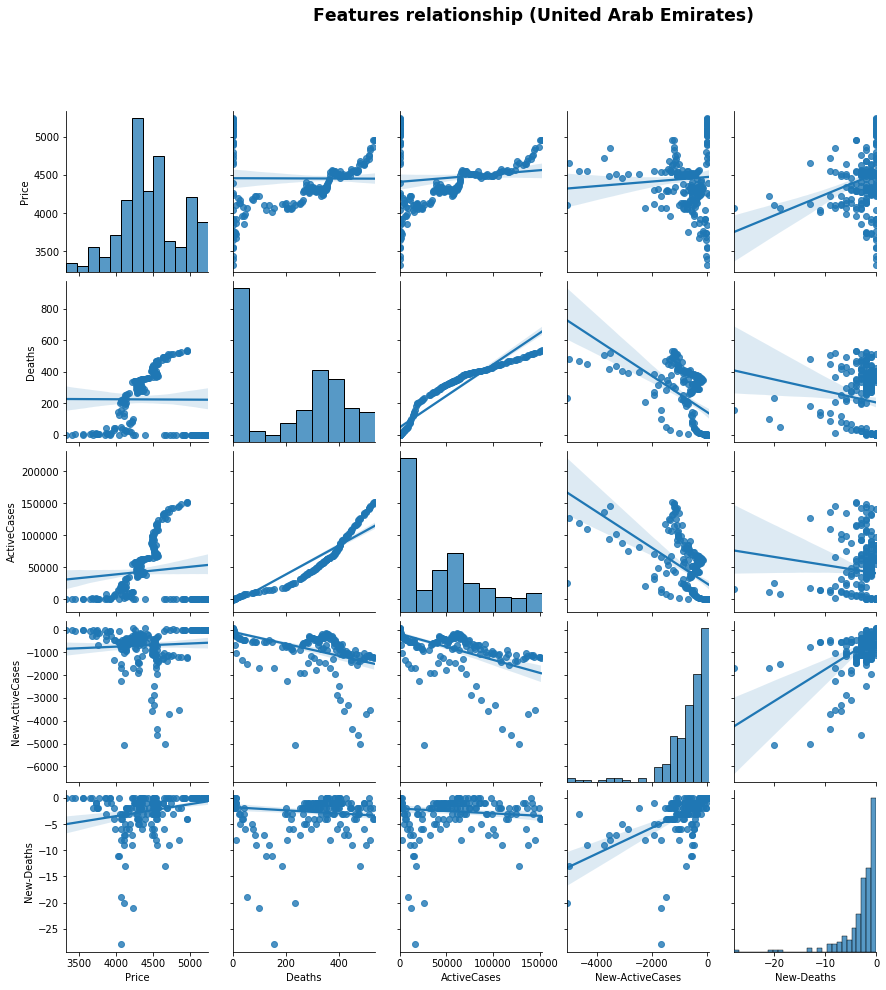

KeyboardInterrupt: ignored

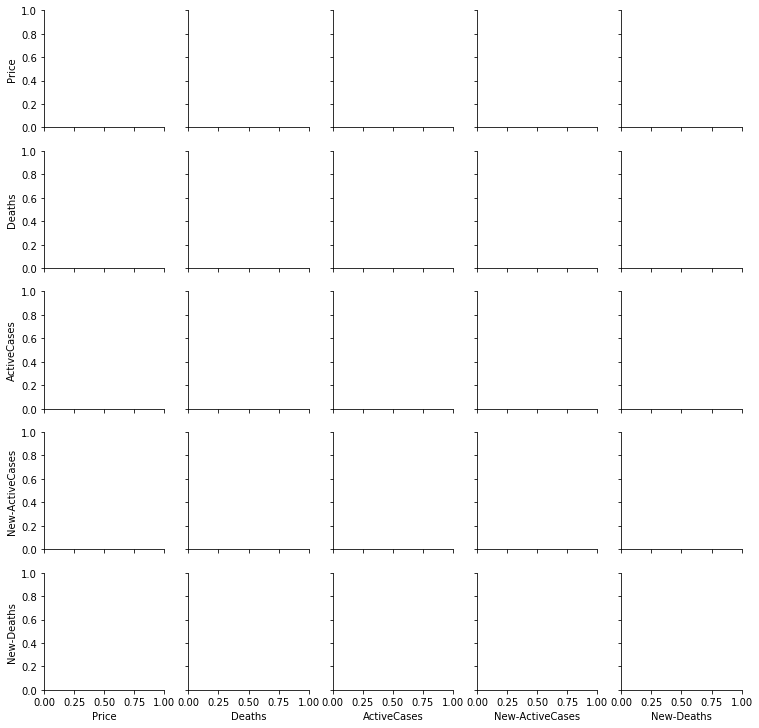

In [ ]:
#get the name of unique countries
countrynames = data_market.Country.unique()
i=1
#using a for loop to plot all countries data
for country,i in zip(countrynames, range(1,14)):
    #get country-wise covid data
    data_covid_world=data_covid[data_covid.Country.eq(country)]
    #get market data for each country
    data_market_country=data_market[data_market.Country.eq(country)]
    #join country-wise covid data and market data
    finaldf2 = pd.merge(data_market_country,data_covid_world , how='inner', on=['Date'])
    #drop unwanted column
    finaldf2= finaldf2.drop(['Volume','Low','Open','Change','High'], 1)
    #fill nan values with 0
    finaldf2=finaldf2.fillna(0)
    #add new active cases as a new column
    finaldf2['New-ActiveCases']=finaldf2['ActiveCases'].diff()
    #add new deaths as a new column
    finaldf2['New-Deaths']=finaldf2['Deaths'].diff()
    #using pairplot to show feautures relationship
    fig = sns.pairplot(finaldf2, kind='reg')
    #set supplots title 
    fig.fig.suptitle(f"Features relationship ({countrynames[i - 1]})",position=(0.6,1.1),fontweight ="semibold",fontsize='xx-large')
    #display plot
    plt.show()